In [53]:
# Deep Learning - Tensorflow library
# Tensorflow uses a data structure called tensors which is n dimensional matrix of
# matrices

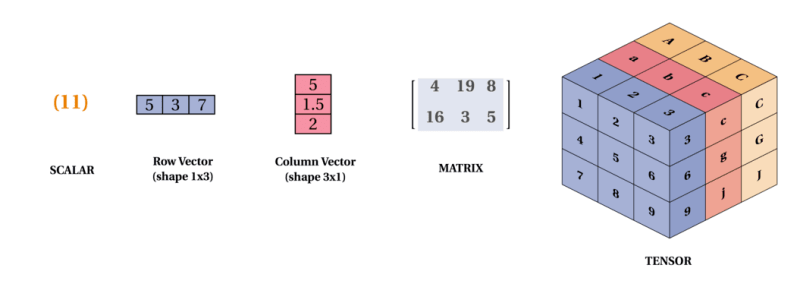

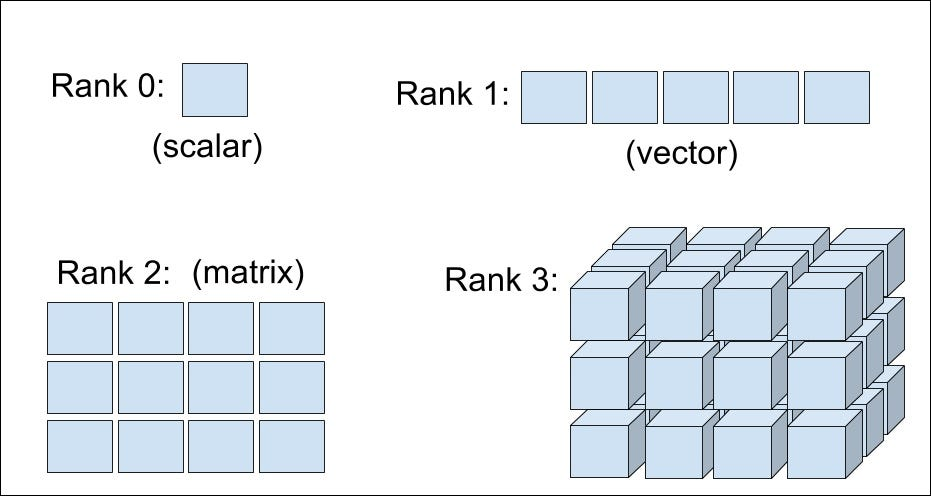

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow

In [55]:
from tensorflow.keras.datasets import mnist

In [56]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [57]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


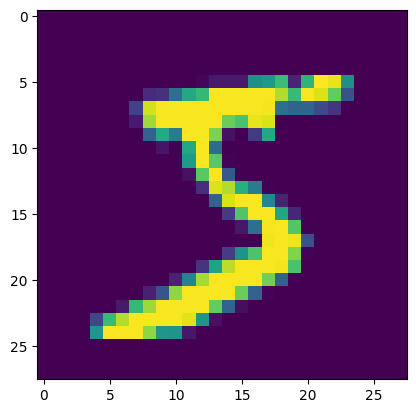

In [58]:
plt.imshow(X_train[0])

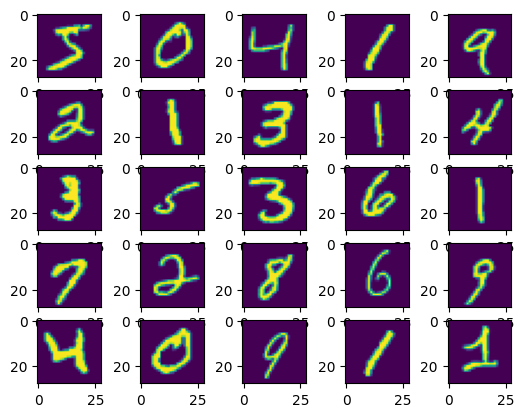

In [59]:
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
plt.show()

In [60]:
# preprocessing of image data - reshape() into 1 Deimensional data
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

# -1 refers to One Dimensional
# 784 = 28 X 28

In [61]:
# preprocessing of image data - Min Max Scaling or Normalization
# Min Max Scaler scales data into range of 0 to 1 and positive only
# Min pixel is 0 and max pixel is 255

X_train=X_train/255
X_test=X_test/255

In [62]:
# Building neural network using tensorflow requires functions to be used

# Sequential() - Model Definition function as Neural Networks are sequential linear
# models
# Dense() - to define a hidden layer and hyper paramters to be deifned in this
# function are number of neurons per layer, activation function to be used like
# relu, sigmoid, tanh, etc. First hidden layer input shape must be given

# Final Dense Layer for output must be defined based on model being built
# Regression Model - Dense(1,activation="linear")
# Binary Classiciation - Dense(2,activation="sigmoid")
# Multinomial Classification - Dense(n_classes, activation="softmax")

# Compile Model metrics
# Optimizer must be defined - optimizers are adam(adaptive Momentum Descent),
# sgd(Stochastic Gradient Descent), etc.
# Loss Function - Regression(Mean_Squared_Error), Binary Classification(
# Binary Cross Entropy), Multinomial Classification(Categorical Cross Entropy)
# Metrics must be defined - Regressison (R2 or RMSE), Classification(Accuracy or
# F1Score)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
# Label Encode Dependent Variable
y_train=tensorflow.keras.utils.to_categorical(y_train,10)
y_test=tensorflow.keras.utils.to_categorical(y_test,10)

In [65]:
# Build Neural Network
nn=Sequential() # intiating Model
# First Hidden layer with 1024 Neurons, activation function is relu, input shapeis
# 784 1D
nn.add(Dense(1024,activation="relu",input_shape=(784,)))
nn.add(Dense(128,activation="relu")) # Second hidden layer with 128 Neurons
nn.add(Dense(10,activation="softmax")) # Final Output layer
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,330 (3.57 MB)

 Trainable params: 936,330 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
nn.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8912 - loss: 0.3765 - val_accuracy: 0.9691 - val_loss: 0.1012
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0768 - val_accuracy: 0.9764 - val_loss: 0.0768
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9763 - val_loss: 0.0703
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.9779 - val_loss: 0.0702
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9810 - val_loss: 0.0650
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9798 - val_loss: 0.0710
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0165 - val_accuracy: 0.9824 - val_loss: 0.0666
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9946 - loss: 0.0149 - val_accuracy: 0.

In [67]:
# Different Neural Networks Models in Deep Learning developed
# Convolutional Neural Netowrks(CNN) - Image Processing
# Recurrent Neural Network (RNN) - Sequential Data like Time Series Data, Text or
# NLP data for Auto fill, Q&A, etc.

# Recurrent Neural Networks(RNN) is a neural network designed for processing
# sequences of data. Sequences of data like timeseries data, text data for auto fill, search, etc
# where immediate past data has an impact in predicting next time step or next data

# For Example Bitcoin prices is effected mostly by previoos 10d/30day rather than
# 200d/500d

# RNN has sequential memory enabling them to learn patterns over sequences and
# use that information for predictions.
# RNN backwardd propagates over time or time steps

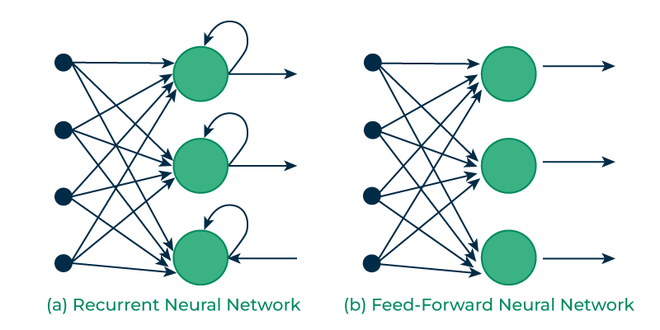

In [68]:
#!pip install yfinance

In [69]:
import yfinance as yf

In [70]:
bitcoin=yf.download("BTC-USD",start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [71]:
bitcoin.shape

(2167, 6)

<Axes: xlabel='Date'>

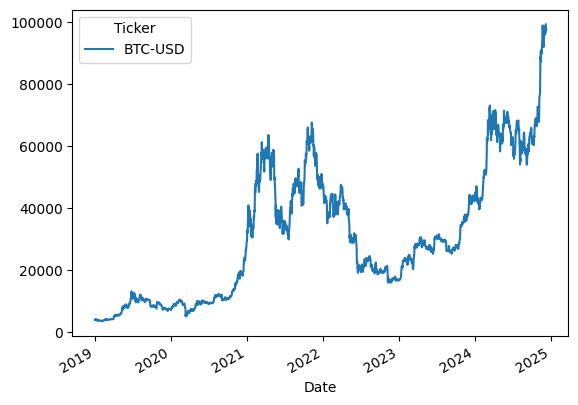

In [72]:
bitcoin.Close.plot(kind="line")

In [73]:
# Data Preprocessing & Reshaping Data into Sequences format
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [74]:
bitcoin=bitcoin.reset_index(drop=True)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
bitcoin_scale=scaler.fit_transform(bitcoin.Close)

In [76]:
bitcoin_scale=bitcoin_scale.flatten() # Convert to 1D array

In [77]:
# Use previous 30 days price to predict for next day
# Sequences of data is created using TimeSeriesGenerator function
n_steps=30
generator=TimeseriesGenerator(bitcoin_scale,bitcoin_scale,length=n_steps,
                              batch_size=1)

In [78]:
for i in range(len(generator)):
  X,y=generator[i]
  print(X,y)

Streaming output truncated to the last 5000 lines.
[[0.4067513  0.40504677 0.40455718 0.40861758 0.42934994 0.42295445
  0.38725311 0.38196612 0.38291688 0.36528671 0.35114633 0.36377109
  0.35345376 0.36425681 0.37344958 0.37231227 0.35776246 0.4149398
  0.42705004 0.4225609  0.40720856 0.37265071 0.37539288 0.36516789
  0.3614355  0.36847631 0.4023196  0.37577738 0.36907799 0.37021497]] [0.35922102]
[[0.40504677 0.40455718 0.40861758 0.42934994 0.42295445 0.38725311
  0.38196612 0.38291688 0.36528671 0.35114633 0.36377109 0.35345376
  0.36425681 0.37344958 0.37231227 0.35776246 0.4149398  0.42705004
  0.4225609  0.40720856 0.37265071 0.37539288 0.36516789 0.3614355
  0.36847631 0.4023196  0.37577738 0.36907799 0.37021497 0.35922102]] [0.37816828]
[[0.40455718 0.40861758 0.42934994 0.42295445 0.38725311 0.38196612
  0.38291688 0.36528671 0.35114633 0.36377109 0.35345376 0.36425681
  0.37344958 0.37231227 0.35776246 0.4149398  0.42705004 0.4225609
  0.40720856 0.37265071 0.37539288 0.3

In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [80]:
rnn=Sequential()
rnn.add(SimpleRNN(50,activation="relu",input_shape=(n_steps,1)))
rnn.add(Dense(1))
rnn.compile(optimizer="adam",loss="mse")
rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
rnn.fit(generator,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2137/2137 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 7.1983e-04
Epoch 2/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.8583e-04
Epoch 3/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.6157e-04
Epoch 4/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.5538e-04
Epoch 5/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3661e-04
Epoch 6/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.4122e-04
Epoch 7/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.9158e-04
Epoch 8/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.4488e-04
Epoch 9/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.3968e-04
Epoch 10/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.0528e-04
Epoch 11/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1871e-04
Epoch 12/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.1669e-04
Epoch 13/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.2566e-04
Epoch 14/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step 

In [82]:
scaler.inverse_transform([[1.9959e-04]])

array([[3418.61285908]])

In [83]:
np.sqrt(3418.65895969) # RMSE

58.4692992919361

In [84]:
from keras.layers import LSTM

In [85]:
lstm=Sequential()
lstm.add(LSTM(50,activation='relu',input_shape=(X.shape[1],1)))
lstm.add(Dense(1))
lstm.compile(optimizer="adam",loss="mse")
lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
lstm.fit(generator,epochs=30)

Epoch 1/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0077
Epoch 2/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.8245e-04
Epoch 3/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.2427e-04
Epoch 4/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.3182e-04
Epoch 5/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.9246e-04
Epoch 6/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.6090e-04
Epoch 7/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.7492e-04
Epoch 8/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.2898e-04
Epoch 9/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3382e-04
Epoch 10/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.3076e-04
Epoch 11/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.1862e-04
Epoch 12/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.2506e-04
Epoch 13/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.1817e-04
Epoch 14/30
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [90]:
scaler.inverse_transform([[1.9650e-04]])

array([[3418.31652036]])

In [91]:
np.sqrt(3418.31652036)

58.46637084991679

In [92]:
future_steps = 30
# Assuming 'generator' is a TimeseriesGenerator or similar object
# and 'X' is the original data used to create the generator
last_sequence = X[-n_steps:].reshape(1, n_steps, 1)  # Extract the last sequence from X and reshape
predictions = []
for _ in range(future_steps):
  next_value = lstm.predict(last_sequence)
  predictions.append(next_value[0, 0])
  # Update last_sequence for the next prediction
  last_sequence = np.append(last_sequence[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

In [93]:
scaler.inverse_transform([predictions])

array([[94224.90664653, 91815.58249613, 89489.71536609, 87288.85084709,
        85210.9482435 , 83243.6319081 , 81375.08066844, 79596.33146918,
        77896.02615282, 76256.02710801, 74670.4008836 , 73136.88385079,
        71639.05326854, 70190.49662571, 68792.65441332, 67445.51519892,
        66148.42161556, 64900.36188978, 63700.15847732, 62546.51379299,
        61438.07308927, 60373.46446995, 59351.30460632, 58370.19873723,
        57428.77496644, 56525.66139774, 55659.51471607, 54829.00303884,
        54032.82878088, 53269.71722194]])